Cody Dirks

T01062670

In [1]:
# Mount to Goolge Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%pip install geopandas contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 45.0 MB/s eta 0:00:00


In [3]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

In [4]:
# Set Working Directory
%cd "/content/drive/MyDrive/Data"

/content/drive/MyDrive/Data


In [5]:
# Question 1
print('Answer to Question 1')
df = pd.read_excel('full_mo_data.xlsx')
df.head()

#df = df[df['east/west/surface'] <= 'East']
#df.head()

df=df[df['Latitude'] >= 38]
df.head(50)


Answer to Question 1


,Latitude,Longitude,MolyConc_mg_kg,Collection_Batche,Site_Name,Veg_Site,Date_Sampled,sheet
0,38.420217,-113.096139,-0.886057,Rhianon,9,ND,2015-02-01,3
1,38.417333,-113.086436,-0.431798,Rhianon,8,ND,2015-02-01,3
2,38.414128,-113.079078,-0.292102,Sydney,S1,A,2020-10-18,3
3,38.415197,-113.078850,0.863323,Rhianon,7,ND,2015-02-01,3
4,38.415031,-113.078614,-0.084741,Sydney,T1,A,2020-10-18,3
5,38.416044,-113.078286,-0.454957,Sydney,U1,A,2020-10-18,3
6,38.416733,-113.078022,-0.174341,Sydney,V1,B,2020-10-18,3
7,38.413847,-113.077953,0.222059,Sydney,S2,A,2020-10-18,3
8,38.417671,-113.077858,-0.420216,Emily II,18,A,2022-03-01,4
9,38.414733,-113.077511,0.138125,Sydney,T2,A,2020-10-18,3


In [6]:
# Question 2
print('Answer to Question 2')
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))
gdf.head()
gdf.set_crs(epsg=4326, inplace=True)
gdf = gdf.to_crs(epsg=3310)
print(gdf.crs)

Answer to Question 2
EPSG:3310


Answer to Questions 3, 4, 5, and 6


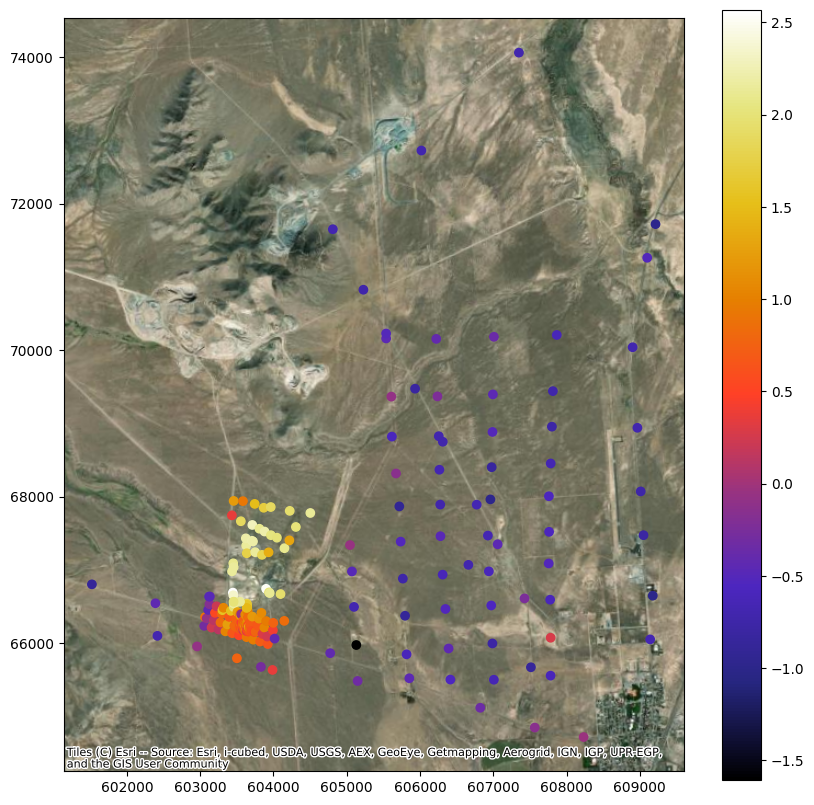

In [7]:
# Questions 3, 4, 5, and 6
print('Answer to Questions 3, 4, 5, and 6')
fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot()

gdf.plot(ax = ax1, column = 'MolyConc_mg_kg', cmap = plt.cm.CMRmap, legend = True)
ctx.add_basemap(ax1, crs=gdf.crs.to_string(), source=ctx.providers.Esri.WorldImagery)

plt.show()


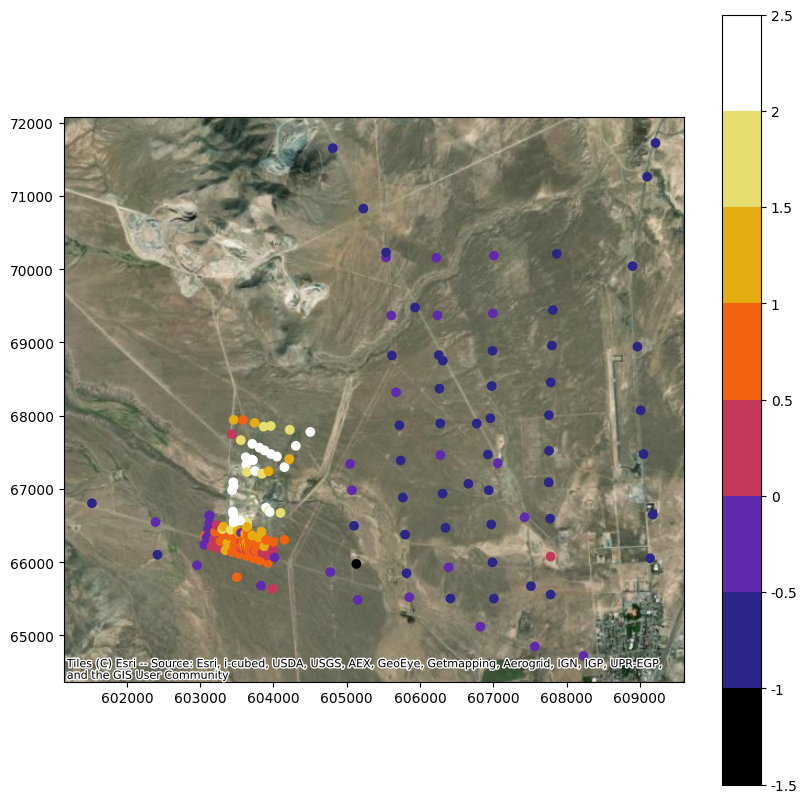

In [8]:
import matplotlib.colors as mcolors
import numpy as np

df2 = df[df['Latitude']<=38.47]

gdf2 = gpd.GeoDataFrame(df2, geometry=gpd.points_from_xy(df2['Longitude'], df2['Latitude']))
gdf.head()
gdf2.set_crs(epsg=4326, inplace=True)
gdf2 = gdf2.to_crs(epsg=3310)

fig = plt.figure(figsize=(10,10))

from matplotlib.colors import BoundaryNorm

boundaries = [-1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5]  # 101 ensures values > 100 are clamped
cmap = plt.cm.CMRmap
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=True)

# Plot with custom norm
ax2 = plt.subplot()
gdf2.plot(
    ax=ax2,
    column='MolyConc_mg_kg',
    cmap=cmap,
    norm=norm,
    #legend=True
)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # Required for ScalarMappable to work without an array
cbar = fig.colorbar(sm, ax=ax2, boundaries=boundaries, spacing='proportional', orientation='vertical')
cbar.set_ticks(boundaries)  # Set ticks to match boundaries
cbar.set_ticklabels([str(b) for b in boundaries])  # Set custom tick labels

# Add basemap
ctx.add_basemap(ax2, crs=gdf2.crs.to_string(), source=ctx.providers.Esri.WorldImagery)

# Show the plot
plt.show()

In [9]:
# Thight Grid Was 9/13/2018

<ipython-input-10-ab91469e739e>:4: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df3 = df[~df['Date_Sampled'].isin(dates_to_exclude)]


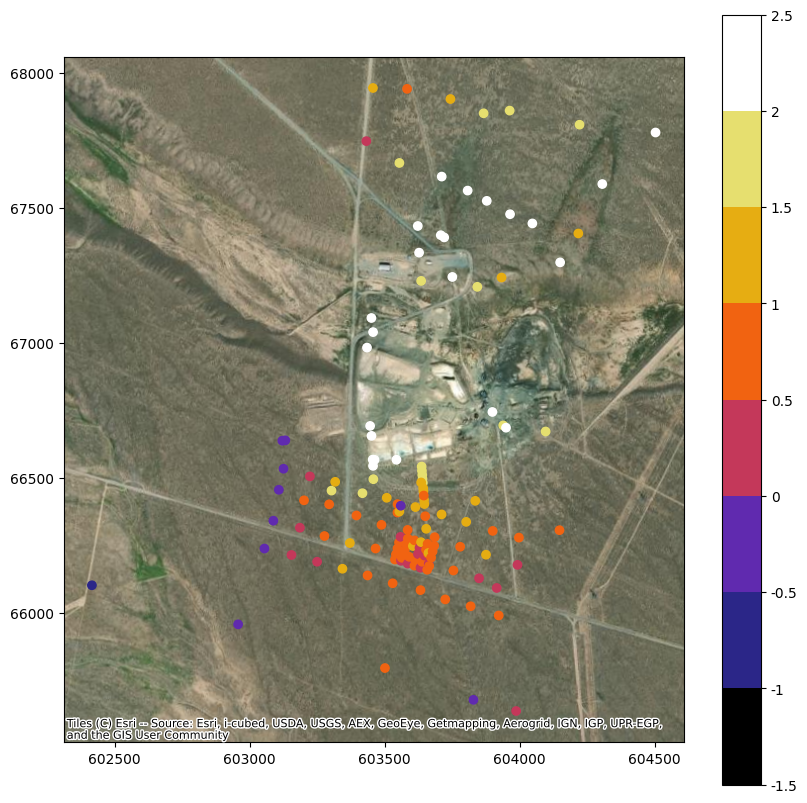

In [10]:
dates_to_exclude = ['2016-03-21', '2015-02-01', '2017-06-13', '']

# Exclude rows where 'Date_Sampled' matches any date in the list
df3 = df[~df['Date_Sampled'].isin(dates_to_exclude)]
df3 = df3[df3['Latitude']<=38.47]
df3 = df3[df3['Longitude']<=-113.05]

gdf3 = gpd.GeoDataFrame(df3, geometry=gpd.points_from_xy(df3['Longitude'], df3['Latitude']))
gdf3.head()
gdf3.set_crs(epsg=4326, inplace=True)
gdf3 = gdf3.to_crs(epsg=3310)

fig = plt.figure(figsize=(10,10))

boundaries = [-1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5]  # 101 ensures values > 100 are clamped
cmap = plt.cm.CMRmap
norm = BoundaryNorm(boundaries, ncolors=cmap.N, clip=True)

# Plot with custom norm
ax3 = plt.subplot()
gdf3.plot(
    ax=ax3,
    column='MolyConc_mg_kg',
    cmap=cmap,
    norm=norm,
    #legend=True
)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # Required for ScalarMappable to work without an array
cbar = fig.colorbar(sm, ax=ax3, boundaries=boundaries, spacing='proportional', orientation='vertical')
cbar.set_ticks(boundaries)  # Set ticks to match boundaries
cbar.set_ticklabels([str(b) for b in boundaries])  # Set custom tick labels

# Add basemap
ctx.add_basemap(ax3, crs=gdf3.crs.to_string(), source=ctx.providers.Esri.WorldImagery)

# Show the plot
plt.show()